  
<h3 style="color:red  ;">Objectif du problème:

On souhaite modéliser la variable d’entrée « Distance_to_next_car  », représentant la
distance séparant un véhicule du suivant.</h3>   

<h3 style="color:pink  ;">Objectif du problème:

On souhaite modéliser la variable d’entrée « Distance_to_next_car  », représentant la
distance séparant un véhicule du suivant.</h3>  


In [5]:
!pip install scikit-fuzzy
!pip install networkx
!pip install scikit-fuzzy
!pip install networkx

In [6]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

distance = np.arange(0, 31, 0.1)


In [7]:
v_small = fuzz.trapmf(distance, [0, 0, 2, 5])
small = fuzz.trimf(distance, [3, 7, 11])
perfect = fuzz.trimf(distance, [9, 13, 17])
big = fuzz.trimf(distance, [15, 20, 25])
v_big = fuzz.trapmf(distance, [23, 26, 30, 30])


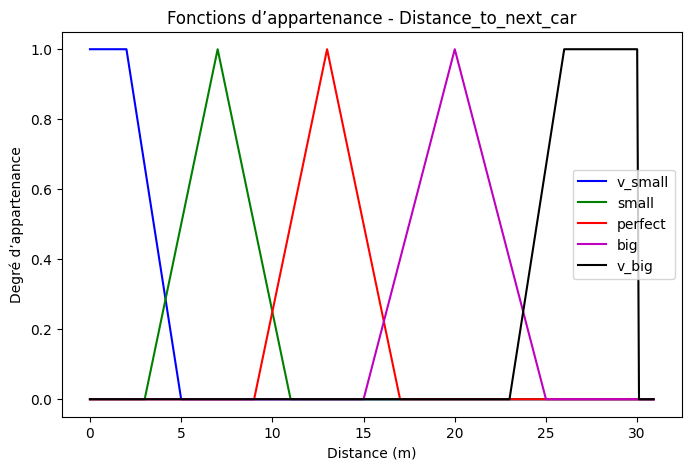

In [8]:
plt.figure(figsize=(8,5))
plt.plot(distance, v_small, 'b', label='v_small')
plt.plot(distance, small, 'g', label='small')
plt.plot(distance, perfect, 'r', label='perfect')
plt.plot(distance, big, 'm', label='big')
plt.plot(distance, v_big, 'k', label='v_big')
plt.title('Fonctions d’appartenance - Distance_to_next_car')
plt.xlabel('Distance (m)')
plt.ylabel('Degré d’appartenance')
plt.legend()
plt.show()


<h3 style="color:pink  ;">Objectif du problème

On veut modéliser une variable floue d’entrée appelée Speed_change,
qui indique comment la vitesse du véhicule change entre deux instants</h3>

In [9]:
speed = np.arange(-20, 21, 0.1)


In [10]:
declining = fuzz.trimf(speed, [-20, -10, -2])
constant = fuzz.trapmf(speed, [-5, -2, 2, 5])
growing = fuzz.trimf(speed, [2, 10, 20])


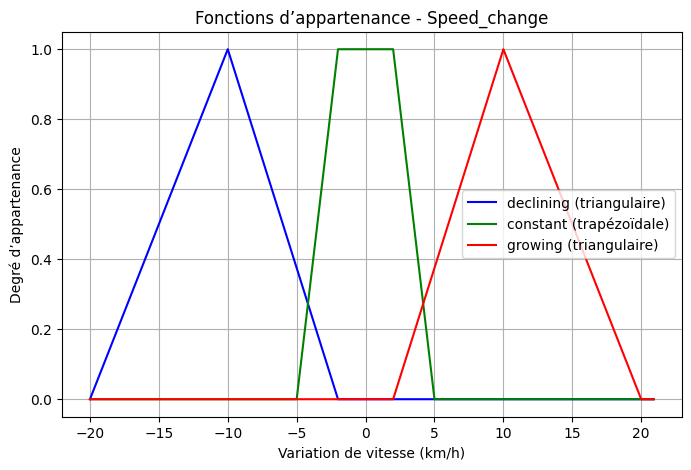

In [11]:
plt.figure(figsize=(8,5))
plt.plot(speed, declining, 'b', label='declining (triangulaire)')
plt.plot(speed, constant, 'g', label='constant (trapézoïdale)')
plt.plot(speed, growing, 'r', label='growing (triangulaire)')
plt.title('Fonctions d’appartenance - Speed_change')
plt.xlabel('Variation de vitesse (km/h)')
plt.ylabel('Degré d’appartenance')
plt.legend()
plt.grid(True)
plt.show()


<h3 style="color:pink  ;">Objectif du problème:

on
souhaite modéliser la variable de sortie « Acceleration_Adjust  », représentant
l’ajustement de l’accélération du véhicule à appliquer selon les conditions de conduite. </h3>   

In [12]:
accel = np.arange(-3, 3.1, 0.1)


In [13]:
acc_neg_big   = fuzz.trapmf(accel, [-3, -3, -2, -1])
acc_neg_small = fuzz.trimf(accel, [-2, -1,  0])
acc_zero      = fuzz.trimf(accel, [-0.5, 0, 0.5])      # aucune variation
acc_pos_small = fuzz.trimf(accel, [ 0,  1,  2])
acc_pos_big   = fuzz.trapmf(accel, [ 1,  2,  3,  3])


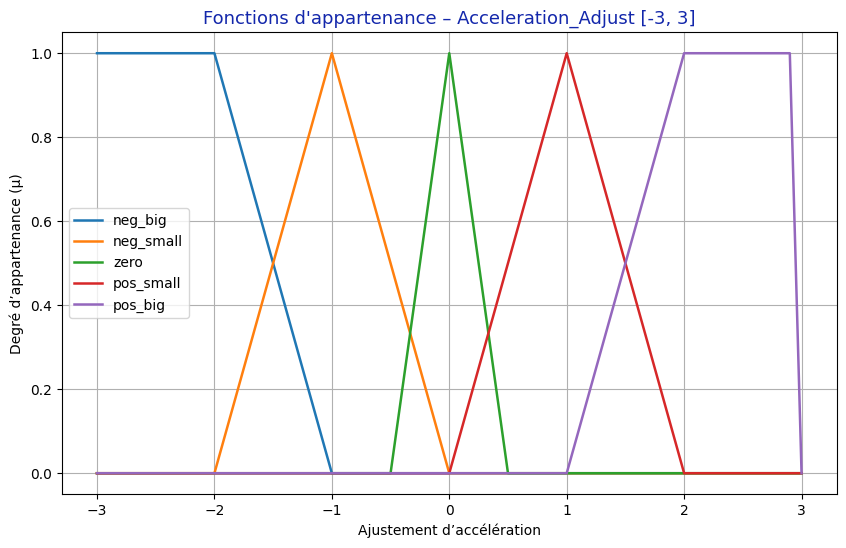

In [14]:

plt.figure(figsize=(10, 6))
plt.plot(accel, acc_neg_big,   linewidth=1.8, label='neg_big')
plt.plot(accel, acc_neg_small, linewidth=1.8, label='neg_small')
plt.plot(accel, acc_zero,      linewidth=1.8, label='zero')
plt.plot(accel, acc_pos_small, linewidth=1.8, label='pos_small')
plt.plot(accel, acc_pos_big,   linewidth=1.8, label='pos_big')

plt.title("Fonctions d'appartenance – Acceleration_Adjust [-3, 3]", fontsize=13, color="#1327AB")
plt.xlabel("Ajustement d’accélération")
plt.ylabel("Degré d’appartenance (μ)")
plt.legend()
plt.grid(True)
plt.show()

<h3 style="color:pink  ;">Objectif du problème:

 on
souhaite maintenant établir la base de règles floues et simuler le comportement du système
de régulation de vitesse.  </h3>

In [15]:
import skfuzzy.control as ctrl

In [16]:
distance = ctrl.Antecedent(np.arange(0, 31, 0.1), 'Distance_to_next_car')
speed = ctrl.Antecedent(np.arange(-20, 21, 0.1), 'Speed_change')
accel = ctrl.Consequent(np.arange(-3, 3.1, 0.1), 'Acceleration_Adjust')

In [17]:
distance['v_small'] = fuzz.trapmf(distance.universe, [0, 0, 2, 5])
distance['small'] = fuzz.trimf(distance.universe, [3, 7, 11])
distance['perfect'] = fuzz.trimf(distance.universe, [9, 13, 17])
distance['big'] = fuzz.trimf(distance.universe, [15, 20, 25])
distance['v_big'] = fuzz.trapmf(distance.universe, [23, 26, 30, 30])

speed['declining'] = fuzz.trapmf(speed.universe, [-20, -20, -10, -2])
speed['constant'] = fuzz.trimf(speed.universe, [-5, 0, 5])
speed['growing'] = fuzz.trapmf(speed.universe, [2, 10, 20, 20])

accel['neg_big'] = fuzz.trapmf(accel.universe, [-3, -3, -2.5, -1.5])
accel['neg_small'] = fuzz.trimf(accel.universe, [-2, -1, 0])
accel['zero'] = fuzz.trimf(accel.universe, [-0.5, 0, 0.5])
accel['pos_small'] = fuzz.trimf(accel.universe, [0, 1, 2])
accel['pos_big'] = fuzz.trapmf(accel.universe, [1.5, 2.2, 3, 3])

In [18]:
rule1 = ctrl.Rule(distance['v_small'] & speed['declining'], accel['neg_small'])
rule2 = ctrl.Rule(distance['v_small'] & speed['constant'], accel['neg_big'])
rule3 = ctrl.Rule(distance['v_small'] & speed['growing'], accel['neg_big'])
rule4 = ctrl.Rule(distance['small'] & speed['declining'], accel['zero'])
rule5 = ctrl.Rule(distance['small'] & speed['constant'], accel['neg_small'])
rule6 = ctrl.Rule(distance['small'] & speed['growing'], accel['neg_big'])
rule7 = ctrl.Rule(distance['perfect'] & speed['declining'], accel['pos_small'])
rule8 = ctrl.Rule(distance['perfect'] & speed['constant'], accel['zero'])
rule9 = ctrl.Rule(distance['perfect'] & speed['growing'], accel['neg_small'])
rule10 = ctrl.Rule(distance['big'] & speed['declining'], accel['pos_big'])
rule11 = ctrl.Rule(distance['big'] & speed['constant'], accel['pos_small'])
rule12 = ctrl.Rule(distance['big'] & speed['growing'], accel['zero'])
rule13 = ctrl.Rule(distance['v_big'] & speed['declining'], accel['pos_big'])
rule14 = ctrl.Rule(distance['v_big'] & speed['constant'], accel['pos_big'])
rule15 = ctrl.Rule(distance['v_big'] & speed['growing'], accel['pos_small'])


Résultat Acceleration_Adjust = 0.244


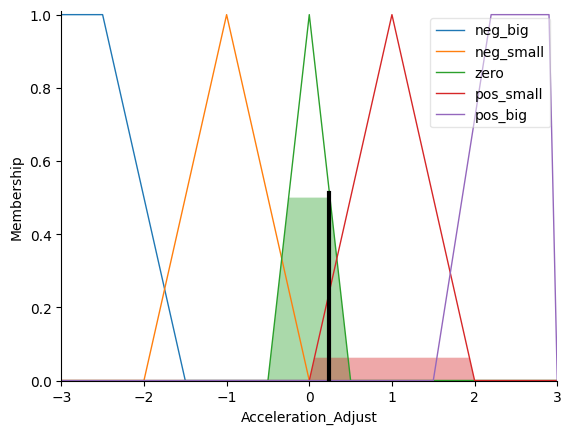

In [19]:
system = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6,
                             rule7, rule8, rule9, rule10, rule11, rule12,
                             rule13, rule14, rule15])

sim = ctrl.ControlSystemSimulation(system)
sim.input['Distance_to_next_car'] = 13
sim.input['Speed_change'] = -2.5
sim.compute()

print("Résultat Acceleration_Adjust =", round(sim.output['Acceleration_Adjust'], 3))
accel.view(sim=sim)


EXERCICE 1.

In [21]:
# === Dataset synthétique (1000 obs) ===
import pandas as pd

np.random.seed(42)
n = 1000

# Entrées couvrant l'univers du TP
distances = np.random.uniform(0, 30, n)
speed_changes = np.random.uniform(-3, 3, n)

# Sortie via le système flou (défuzzifiée)
accel_outputs = []
for d, s in zip(distances, speed_changes):
    sim.input['Distance_to_next_car'] = d
    sim.input['Speed_change'] = s
    sim.compute()
    accel_outputs.append(sim.output['Acceleration_Adjust'])

data = pd.DataFrame({
    'Distance_to_next_car': distances,
    'Speed_change': speed_changes,
    'Acceleration_Adjust': accel_outputs
})

print(" Aperçu du dataset :")
data.head()


 Aperçu du dataset :


,Distance_to_next_car,Speed_change,Acceleration_Adjust
0,11.236204,-1.889202,7.967682e-17
1,28.521429,0.251406,2.376353e+00
2,21.959818,2.237675,9.758842e-01
3,17.959755,1.393349,1.000000e+00
4,4.680559,1.839367,-1.213150e+00


In [23]:
# === ML : RandomForest pour prédire Acceleration_Adjust ===
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor

X = data[['Distance_to_next_car', 'Speed_change']]
y = data['Acceleration_Adjust']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f" MAE = {mae:.4f}")
print(f" MSE = {mse:.4f}")


 MAE = 0.0117
 MSE = 0.0009


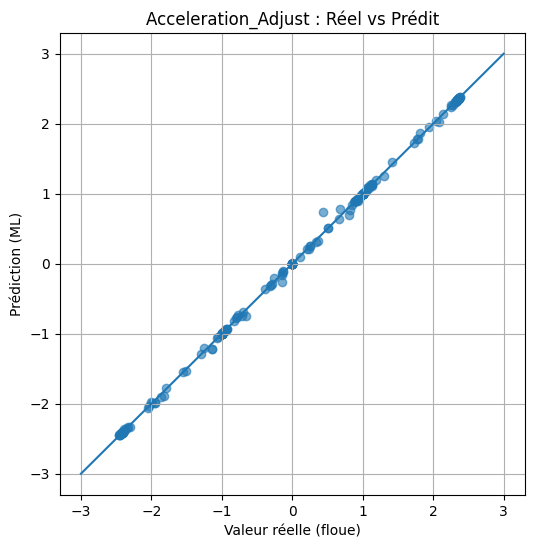

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([-3,3], [-3,3])  # diagonale (idéal)
plt.xlabel("Valeur réelle (floue)")
plt.ylabel("Prédiction (ML)")
plt.title("Acceleration_Adjust : Réel vs Prédit")
plt.grid(True)
plt.show()


5) Mini conclusion à coller dans ton rapport

Logique floue (explicabilité) :

 Interprétable : chaque décision vient de règles “si … alors …”.

 Transparent : facile d’ajuster le comportement via les MFs/règles.

 Sensible au choix des paramètres et nécessite un expert métier.

ML (précision / généralisation) :

 Apprend automatiquement des patterns (peut surpasser la logique floue si beaucoup de données).

 Capte des interactions non triviales entre entrées.

 Moins explicable (boîte noire), nécessite des données et une évaluation rigoureuse.